In [127]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
Y = data.target



I have used breast_cancer dataset available in the Sckitlearn to demonstrate what how training and testing accuracy varies as we change the value of K in KNN.

#  1(a) Training Error 

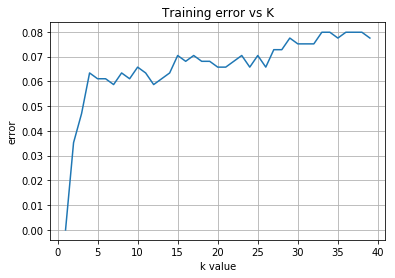

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
results = []
x = []
for i in range (1, 40):#change the values in loop to play around with the model and see how value of k effects the errrors
    x.append(i)
    classifier = KNeighborsClassifier(n_neighbors = i)  
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_train)
    acc = accuracy_score(y_train, y_predict)
    results.append(1 - acc)
plt.grid()
plt.title('Training error vs K')
plt.xlabel('k value')
plt.ylabel('error')
plt.plot(x, results)


As we can see from the above graph, when k=0, training error is 0. This is because the test point itself will be it's closest neighbour, and it will select itself. As we increase the value of k, the test point will slowly move away from it's original position, and the error will increase.

# 1(b) Generalization Error 

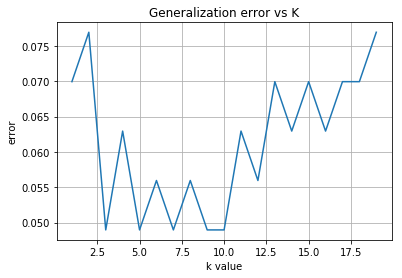

In [175]:


X_train, X_test, y_train, y_test = train_test_split(X, Y)
results = []
x = []
for i in range (1, 20): #change the values in loop to play around with the model and see how value of k effects the errrors
    x.append(i)
    classifier = KNeighborsClassifier(n_neighbors = i)  
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_predict)
    results.append(1 - acc)
    
plt.grid()
plt.title('Generalization error vs K')
plt.xlabel('k value')
plt.ylabel('error')

plt.plot(x, results)


For k = 1 error is very high because the model overfits when we are looking at the 1 nearest neighbour. This is not desirable, therefore as we keep on increasing the value of k, we will reach the optimum in middle range. Then as we keep on increasing, the error again starts to increase, beacause we are past the optimum k value. 
There is no defined optimum value of k, we have to test our dataset for various k's, and then decide accordingly what should be our k which minimizes our error. Therefore, it is safe to say that optimum value of k varies from dataset to dataset. The only rule that we can infer from the above graph is that the value of k should not be too small, in that case the model will overfit, and given that, value of k should also not be too close to no. of data points, in that case knn will start behaving as a majority function, and return the class which is in majority in the training set everytime.

# 1(c) kNN and Curse of Dimensionality  

kNN is undesirable in case of high dimensional data, beacause, case of highly dimesnional data, there is not much difference between the distances of nearest and farthest points from query points.

reference : https://ieeexplore.ieee.org/abstract/document/6065061

Also since the distance metric used in kNN is  Euclidean distance. In case of high dimension data, the no. of data points in the highly dimensional space become very sparse, our data is lost in the hypercube, and the eucledian distance between all the points is almost same, thus, we'll not gain much information if we use eucledian distance in higher dimensions. 



#   1(d) Is it possible to implement kNN with Univariate Decision Tree? 

kNN takes into account all the attributes while it calculates the nearest neighbours for prediction, whreas a univariate decision tree split the data on the basis of a single attribute only, and in case if we get a pure node after the first split itself, our decision tree will not look for further splits and classify the given data according to  single attribute only. Therefore, a univariate decision tree cannot be used to implement kNN.